In [59]:
import numpy as np
import pandas as pd

reading the datasets

In [221]:
bike=pd.read_csv("bike.csv")

cab=pd.read_csv("yellow_raw.csv")

In [62]:
bike.head()

,Unnamed: 0,duration,pick_sid,pick_sname,pick_blat,pick_blong,drop_sid,drop_sname,drop_blat,drop_blong,user_type,pick_btime,drop_btime,pick_bdate,drop_bdate
0,0,538,536,1 Ave & E 30 St,40.741444,-73.975361,497,E 17 St & Broadway,40.737050,-73.990093,Subscriber,00:00:03,00:09:02,5/1/2016,5/1/2016
1,1,224,361,Allen St & Hester St,40.716059,-73.991908,340,Madison St & Clinton St,40.712690,-73.987763,Subscriber,00:00:04,00:03:49,5/1/2016,5/1/2016
2,2,328,301,E 2 St & Avenue B,40.722174,-73.983688,311,Norfolk St & Broome St,40.717227,-73.988021,Subscriber,00:00:14,00:05:43,5/1/2016,5/1/2016
3,3,1196,3141,1 Ave & E 68 St,40.765005,-73.958185,237,E 11 St & 2 Ave,40.730473,-73.986724,Customer,00:00:20,00:20:17,5/1/2016,5/1/2016
4,4,753,492,W 33 St & 7 Ave,40.750200,-73.990931,228,E 48 St & 3 Ave,40.754601,-73.971879,Subscriber,00:00:26,00:13:00,5/1/2016,5/1/2016


In [63]:
bike.shape

(1212280, 15)

In [64]:
cab.head()

,Unnamed: 0,VendorID,passenger_count,trip_dist,pick_long,pick_lat,drop_long,drop_lat,fare,pick_time,drop_time,pick_date,drop_date
0,0,1,1,3.60,-73.985901,40.768040,-73.983986,40.730099,15.0,00:00:00,00:17:31,2016-05-01,2016-05-01
1,1,2,1,1.68,-73.991577,40.744751,-73.975700,40.765469,7.5,00:00:00,00:07:31,2016-05-01,2016-05-01
2,2,2,6,1.09,-73.993073,40.741573,-73.980995,40.744633,6.5,00:00:00,00:07:01,2016-05-01,2016-05-01
3,3,2,1,4.21,-73.991943,40.684601,-74.002258,40.733002,17.0,00:00:00,00:19:47,2016-05-01,2016-05-01
4,4,2,1,0.56,-74.005280,40.740192,-73.997498,40.737564,6.0,00:00:00,00:06:39,2016-05-01,2016-05-01


In [65]:
cab.shape

(11836853, 13)

slicing 500k rows from bike and cabs data

In [66]:
bike_citi=bike[:500000]

In [67]:
pd.set_option('display.max_columns', 500)

In [75]:
bike_citi.head()

,duration,pick_sid,pick_sname,pick_blat,pick_blong,drop_sid,drop_sname,drop_blat,drop_blong,pick_btime,drop_btime,pick_bdate,drop_bdate
0,538,536,1 Ave & E 30 St,40.741444,-73.975361,497,E 17 St & Broadway,40.737050,-73.990093,00:00:03,00:09:02,5/1/2016,5/1/2016
1,224,361,Allen St & Hester St,40.716059,-73.991908,340,Madison St & Clinton St,40.712690,-73.987763,00:00:04,00:03:49,5/1/2016,5/1/2016
2,328,301,E 2 St & Avenue B,40.722174,-73.983688,311,Norfolk St & Broome St,40.717227,-73.988021,00:00:14,00:05:43,5/1/2016,5/1/2016
3,1196,3141,1 Ave & E 68 St,40.765005,-73.958185,237,E 11 St & 2 Ave,40.730473,-73.986724,00:00:20,00:20:17,5/1/2016,5/1/2016
4,753,492,W 33 St & 7 Ave,40.750200,-73.990931,228,E 48 St & 3 Ave,40.754601,-73.971879,00:00:26,00:13:00,5/1/2016,5/1/2016


we will try to project the lat and long of pickup and drop off of cabs and bikes. so we drop the rest of the features.

In [113]:
bike_citi.drop(['duration'],axis = 1, inplace = True)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [114]:
bike_citi.head()

,pick_blat,pick_blong,drop_blat,drop_blong
0,40.741444,-73.975361,40.737050,-73.990093
1,40.716059,-73.991908,40.712690,-73.987763
2,40.722174,-73.983688,40.717227,-73.988021
3,40.765005,-73.958185,40.730473,-73.986724
4,40.750200,-73.990931,40.754601,-73.971879


In [86]:
bike_citi.drop_bdate = pd.to_numeric(bike_citi['drop_bdate'], errors='coerse')


/usr/local/lib/python3.5/dist-packages/pandas/core/generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [96]:
bike_citi.dtypes

duration        int64
pick_sid        int64
pick_blat     float64
pick_blong    float64
drop_sid        int64
drop_blat     float64
drop_blong    float64
dtype: object

In [100]:
cab_y=cab[:500000]

In [101]:
cab_y.rename(columns={'pick_long': 'pick_blong','pick_lat': 'pick_blat','drop_long': 'drop_blong','drop_lat': 'drop_blat','pick_time': 'pick_btime','drop_time': 'drop_btime','drop_date': 'drop_bdate','pick_date': 'pick_bdate'}, inplace=True)

/usr/local/lib/python3.5/dist-packages/pandas/core/frame.py:2746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [102]:
cab_y.head()

,Unnamed: 0,VendorID,passenger_count,trip_dist,pick_blong,pick_blat,drop_blong,drop_blat,fare,pick_btime,drop_btime,pick_bdate,drop_bdate
0,0,1,1,3.60,-73.985901,40.768040,-73.983986,40.730099,15.0,00:00:00,00:17:31,2016-05-01,2016-05-01
1,1,2,1,1.68,-73.991577,40.744751,-73.975700,40.765469,7.5,00:00:00,00:07:31,2016-05-01,2016-05-01
2,2,2,6,1.09,-73.993073,40.741573,-73.980995,40.744633,6.5,00:00:00,00:07:01,2016-05-01,2016-05-01
3,3,2,1,4.21,-73.991943,40.684601,-74.002258,40.733002,17.0,00:00:00,00:19:47,2016-05-01,2016-05-01
4,4,2,1,0.56,-74.005280,40.740192,-73.997498,40.737564,6.0,00:00:00,00:06:39,2016-05-01,2016-05-01


In [112]:
cab_y.drop(['drop_bdate'],axis = 1, inplace = True)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [116]:
cab_y.head()
cab_y.dtypes

pick_blong    float64
pick_blat     float64
drop_blong    float64
drop_blat     float64
dtype: object

we concatenate both bike and cab datasets to apply the SOM algorithm

In [117]:
data = pd.concat([bike_citi,cab_y])

In [118]:
data.head()

,drop_blat,drop_blong,pick_blat,pick_blong
0,40.737050,-73.990093,40.741444,-73.975361
1,40.712690,-73.987763,40.716059,-73.991908
2,40.717227,-73.988021,40.722174,-73.983688
3,40.730473,-73.986724,40.765005,-73.958185
4,40.754601,-73.971879,40.750200,-73.990931


after combining we have now 1 million rows

In [202]:
data.shape

(1000000, 5)

id column is created to reference any row from the data 

In [120]:
data.insert(0, 'id', range(0, 0 + len(data)))
data

,id,drop_blat,drop_blong,pick_blat,pick_blong
0,0,40.737050,-73.990093,40.741444,-73.975361
1,1,40.712690,-73.987763,40.716059,-73.991908
2,2,40.717227,-73.988021,40.722174,-73.983688
3,3,40.730473,-73.986724,40.765005,-73.958185
4,4,40.754601,-73.971879,40.750200,-73.990931
5,5,40.740259,-73.984092,40.727408,-73.981420
6,6,40.727434,-73.993790,40.722104,-73.997249
7,7,40.759107,-73.959223,40.729170,-73.998102
8,8,40.742388,-73.997262,40.730386,-74.002150
9,9,40.727408,-73.981420,40.746745,-74.007756


In [121]:
data.dtypes

id              int64
drop_blat     float64
drop_blong    float64
pick_blat     float64
pick_blong    float64
dtype: object

extracting the features of the data 

In [122]:
X = data.iloc[:].values

scaling the features using sklearn

In [123]:
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler(feature_range = (0,1))

In [124]:
X = sc.fit_transform(X)

implementation of som using minisom class 

In [125]:
from minisom import MiniSom

initialising the weights randomly close to 0 

the hyper parameters being sigma and learning rate changing them to 0.5 and 0.3 and running the model to 100 iterations

In [176]:
som = MiniSom(x = 5, y = 5, input_len = 5, sigma = 0.5, learning_rate = 0.3)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

In [177]:
from pylab import bone, pcolor, colorbar, plot, show

In [178]:
%matplotlib inline

visualisng the SOM mappings using pylab

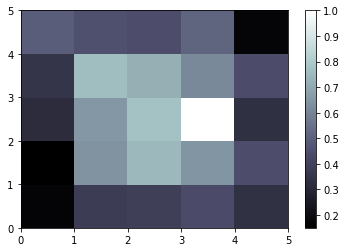

In [179]:
bone()
pcolor(som.distance_map().T)
colorbar()

creating the mappings for each row**

In [180]:
mappings = som.win_map(X)

In [181]:
len(mappings)

25

extracting the clusters based on the similar inter neuron distances.

In [182]:
cluster1 = np.concatenate((mappings[(0,1)],mappings[(0,0)],mappings[(4,4)]), axis = 0)
cluster1 = sc.inverse_transform(cluster1)

In [188]:
cluster8 = np.concatenate((mappings[(0,2)],mappings[(4,0)],mappings[(4,2)],mappings[(0,3)]), axis = 0)
cluster8 = sc.inverse_transform(cluster8)

In [184]:
cluster3 = np.concatenate((mappings[(0,4)],mappings[(4,1)],mappings[(4,3)]), axis = 0)
cluster3 = sc.inverse_transform(cluster3)

In [185]:
cluster4 = np.concatenate((mappings[(1,3)],mappings[(2,2)]), axis = 0)
cluster4 = sc.inverse_transform(cluster4)

In [187]:
cluster7 = np.concatenate((mappings[(2,1)],mappings[(2,3)]), axis = 0)
cluster7 = sc.inverse_transform(cluster7)

In [189]:
cluster6 = np.concatenate((mappings[(1,1)],mappings[(1,2)],mappings[(3,1)],mappings[(3,3)]), axis = 0)
cluster6 = sc.inverse_transform(cluster6)

In [190]:
cluster9 = np.concatenate((mappings[(1,0)],mappings[(2,0)],mappings[(1,4)],mappings[(2,4)]), axis = 0)
cluster9 = sc.inverse_transform(cluster9)

In [191]:
cluster10 = np.concatenate((mappings[(3,0)],mappings[(0,4)],mappings[(3,4)]), axis = 0)
cluster10 = sc.inverse_transform(cluster10)

In [199]:
c10=pd.DataFrame(cluster10)
c10.head()


,0,1,2,3,4
0,532182.0,40.590717,-73.886681,40.590717,-73.886681
1,532208.0,40.666523,-73.931274,40.649086,-73.964058
2,532283.0,40.659424,-73.949646,40.644447,-73.782143
3,532300.0,40.598606,-73.965324,40.641693,-73.788269
4,532358.0,40.659306,-73.990082,40.666798,-73.981750


In [201]:
len(c1+c3+c8+c7+c6+c9+c10+c4)

229202

In [211]:
c4.rename(columns={0: 'id'}, inplace=True)
c4.head()

,id,1,2,3,4
0,403263.0,40.692371,-73.937054,40.709056,-74.010434
1,403281.0,40.680983,-73.950048,40.685153,-73.941110
2,403286.0,40.701485,-73.986569,40.702772,-73.993836
3,403394.0,40.713126,-73.984844,40.714275,-73.989900
4,403401.0,40.710451,-73.960876,40.717452,-73.958509


In [220]:
c4.head()

,id,1,2,3,4
0,403263.0,40.692371,-73.937054,40.709056,-74.010434
1,403281.0,40.680983,-73.950048,40.685153,-73.941110
2,403286.0,40.701485,-73.986569,40.702772,-73.993836
3,403394.0,40.713126,-73.984844,40.714275,-73.989900
4,403401.0,40.710451,-73.960876,40.717452,-73.958509


In [223]:
bike1=bike[:500000]

In [243]:
cab1=cab[:500000]

In [260]:
bike1.head()

,pick_sid,pick_sname,pick_blat,pick_blong,drop_sid,drop_sname,drop_blat,drop_blong,user_type,pick_btime,drop_btime,pick_bdate,drop_bdate,type,fare,trip_dist,passenger_count,VendorID
0,536,1 Ave & E 30 St,40.741444,-73.975361,497,E 17 St & Broadway,40.737050,-73.990093,Subscriber,00:00:03,00:09:02,5/1/2016,5/1/2016,0,0,0,0,0
1,361,Allen St & Hester St,40.716059,-73.991908,340,Madison St & Clinton St,40.712690,-73.987763,Subscriber,00:00:04,00:03:49,5/1/2016,5/1/2016,0,0,0,0,0
2,301,E 2 St & Avenue B,40.722174,-73.983688,311,Norfolk St & Broome St,40.717227,-73.988021,Subscriber,00:00:14,00:05:43,5/1/2016,5/1/2016,0,0,0,0,0
3,3141,1 Ave & E 68 St,40.765005,-73.958185,237,E 11 St & 2 Ave,40.730473,-73.986724,Customer,00:00:20,00:20:17,5/1/2016,5/1/2016,0,0,0,0,0
4,492,W 33 St & 7 Ave,40.750200,-73.990931,228,E 48 St & 3 Ave,40.754601,-73.971879,Subscriber,00:00:26,00:13:00,5/1/2016,5/1/2016,0,0,0,0,0


In [245]:
cab1.rename(columns={'pick_long': 'pick_blong','pick_lat': 'pick_blat','drop_long': 'drop_blong','drop_lat': 'drop_blat','pick_time': 'pick_btime','drop_time': 'drop_btime','drop_date': 'drop_bdate','pick_date': 'pick_bdate'}, inplace=True)

/usr/local/lib/python3.5/dist-packages/pandas/core/frame.py:2746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [259]:
cab1.head()

,VendorID,passenger_count,trip_dist,pick_blong,pick_blat,drop_blong,drop_blat,fare,pick_btime,drop_btime,pick_bdate,drop_bdate,pick_sname,drop_sname,type,duration,pick_sid,drop_sid,user_type
0,1,1,3.60,-73.985901,40.768040,-73.983986,40.730099,15.0,00:00:00,00:17:31,2016-05-01,2016-05-01,na,na,1,0,999999,111111,cabrider
1,2,1,1.68,-73.991577,40.744751,-73.975700,40.765469,7.5,00:00:00,00:07:31,2016-05-01,2016-05-01,na,na,1,0,999999,111111,cabrider
2,2,6,1.09,-73.993073,40.741573,-73.980995,40.744633,6.5,00:00:00,00:07:01,2016-05-01,2016-05-01,na,na,1,0,999999,111111,cabrider
3,2,1,4.21,-73.991943,40.684601,-74.002258,40.733002,17.0,00:00:00,00:19:47,2016-05-01,2016-05-01,na,na,1,0,999999,111111,cabrider
4,2,1,0.56,-74.005280,40.740192,-73.997498,40.737564,6.0,00:00:00,00:06:39,2016-05-01,2016-05-01,na,na,1,0,999999,111111,cabrider


In [251]:
bike1.drop(['duration'],axis = 1, inplace = True)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [255]:
cab1['type']=1

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [256]:
bike1['type']=0

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [257]:
bike1['fare']=0
bike1['trip_dist']=0
bike1['passenger_count']=0
bike1['VendorID']=0

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [258]:

cab1['duration']=0
cab1['pick_sid']=999999
cab1['drop_sid']=111111
cab1['user_type']='cabrider'


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [261]:
data2 = pd.concat([bike1,cab1])

In [262]:
data2.shape

(1000000, 19)

In [295]:
pd.set_option('display.max_rows', 10)

merging the cluster dataframes with the original data plugging back the features of each row in the clusters 
to understand and analyze the properties.

In [309]:
m4 = pd.merge(left=data2,right=c4, left_on='id', right_on= 'id')

In [265]:
m1.shape

(107744, 24)

In [302]:
m1.head()

,id,VendorID,drop_bdate,drop_blat,drop_blong,drop_btime,drop_sid,drop_sname,duration,fare,passenger_count,pick_bdate,pick_blat,pick_blong,pick_btime,pick_sid,pick_sname,trip_dist,type,user_type,1,2,3,4,trip
0,416296,0,5/12/2016,40.686501,-73.965633,21:41:57,275,Washington Ave & Greene Ave,NaN,0.0,0,5/12/2016,40.685160,-73.977114,21:36:28,3222,Hanson Pl & St Felix St,0.0,0,Subscriber,40.686501,-73.965633,40.685160,-73.977114,Hanson Pl & St Felix StWashington Ave & Greene...
1,416341,0,5/12/2016,40.693261,-73.968896,21:47:34,366,Clinton Ave & Myrtle Ave,NaN,0.0,0,5/12/2016,40.688226,-73.979382,21:37:49,243,Fulton St & Rockwell Pl,0.0,0,Subscriber,40.693261,-73.968896,40.688226,-73.979382,Fulton St & Rockwell PlClinton Ave & Myrtle Ave
2,416422,0,5/12/2016,40.692362,-73.986317,21:52:35,323,Lawrence St & Willoughby St,NaN,0.0,0,5/12/2016,40.699918,-73.989718,21:40:37,321,Cadman Plaza E & Red Cross Pl,0.0,0,Subscriber,40.692362,-73.986317,40.699918,-73.989718,Cadman Plaza E & Red Cross PlLawrence St & Wil...
3,416424,0,5/12/2016,40.684568,-73.958811,21:43:21,289,Monroe St & Classon Ave,NaN,0.0,0,5/12/2016,40.685144,-73.953809,21:40:41,344,Monroe St & Bedford Ave,0.0,0,Subscriber,40.684568,-73.958811,40.685144,-73.953809,Monroe St & Bedford AveMonroe St & Classon Ave
4,416442,0,5/12/2016,40.690649,-73.956431,21:50:37,409,DeKalb Ave & Skillman St,NaN,0.0,0,5/12/2016,40.692362,-73.986317,21:41:19,323,Lawrence St & Willoughby St,0.0,0,Subscriber,40.690649,-73.956431,40.692362,-73.986317,Lawrence St & Willoughby StDeKalb Ave & Skillm...


In [290]:
m1['trip']=m1['pick_sname']+m1['drop_sname']

In [294]:
m1['user_type'].value_counts()

cabrider      101337
Subscriber      6031
Customer         376
Name: user_type, dtype: int64

In [293]:
m1['type'].value_counts()

1    101337
0      6407
Name: type, dtype: int64

In [297]:
m1['trip_dist'].value_counts()

0.00     6760
0.90     2370
0.80     2331
1.00     2266
0.70     2257
         ... 
22.35       1
29.12       1
14.13       1
23.32       1
30.60       1
Name: trip_dist, Length: 2365, dtype: int64

In [298]:
m1['pick_sname'].value_counts()

na                             101337
Penn Station Valet                110
W 42 St & Dyer Ave                102
8 Ave & W 31 St N                  69
Pershing Square North              66
                                ...  
Verona Pl & Fulton St               1
Myrtle Ave & Marcy Ave              1
Lafayette Ave & Classon Ave         1
Bedford Ave & S 9 St                1
McKibbin St & Manhattan Ave         1
Name: pick_sname, Length: 446, dtype: int64

In [299]:
m1['passenger_count'].value_counts()

1    69320
2    16220
0     6409
5     5668
3     4603
6     3485
4     2038
7        1
Name: passenger_count, dtype: int64

In [300]:
m1['fare'].value_counts()

0.00      6425
5.50      5634
6.00      5614
5.00      5539
6.50      5357
          ... 
86.50        1
58.34        1
103.25       1
242.00       1
88.50        1
Name: fare, Length: 267, dtype: int64

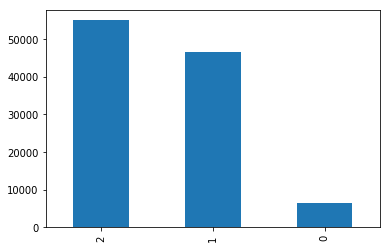

In [277]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
m1['VendorID'].value_counts().plot(kind='bar')

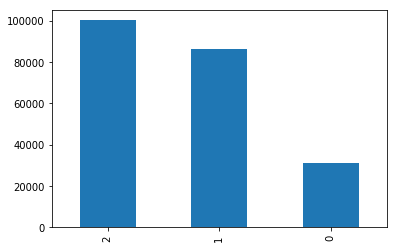

In [319]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
m3['VendorID'].value_counts().plot(kind='bar')

In [301]:
m1['drop_sname'].value_counts()

na                           101337
E 47 St & Park Ave               81
Pershing Square North            70
E 53 St & Lexington Ave          62
W 52 St & 5 Ave                  60
                              ...  
Bedford Ave & S 9 St              1
31 St & Thomson Ave               1
Broadway & W 24 St                1
Marcy Ave & Lafayette Ave         1
21 St & 41 Ave                    1
Name: drop_sname, Length: 452, dtype: int64

In [316]:
m3['trip']=m3['pick_sname']+m3['drop_sname']
m3['passenger_count'].value_counts()

1    130616
0     31045
2     28530
5     10074
3      7854
6      5878
4      3646
9         1
Name: passenger_count, dtype: int64

In [311]:
m3['user_type'].value_counts()

cabrider      186609
Subscriber     24280
Customer        6755
Name: user_type, dtype: int64

In [312]:
m3['type'].value_counts()

1    186609
0     31035
Name: type, dtype: int64

In [313]:

m3['trip_dist'].value_counts()

0.00     32821
1.00      4027
0.90      4013
0.80      3837
1.10      3822
         ...  
24.82        1
20.77        1
26.00        1
15.49        1
36.80        1
Name: trip_dist, Length: 2490, dtype: int64

In [314]:

m3['fare'].value_counts()

0.0      31110
6.0       9609
6.5       9481
5.5       9345
7.0       9309
         ...  
145.0        1
138.0        1
96.5         1
77.5         1
103.5        1
Name: fare, Length: 382, dtype: int64

In [315]:

m3['pick_sname'].value_counts()

na                          186609
West St & Chambers St          277
Carmine St & 6 Ave             236
Cleveland Pl & Spring St       231
Central Park S & 6 Ave         226
                             ...  
Leonard St & Bayard St           4
Cambridge Pl & Gates Ave         3
21 St & 43 Ave                   3
48 Ave & 5 St                    3
47 Ave & 31 St                   1
Name: pick_sname, Length: 463, dtype: int64

In [317]:
m3['trip'].value_counts()

nana                                                                  186609
Central Park S & 6 AveCentral Park S & 6 Ave                              49
Central Park S & 6 Ave5 Ave & E 78 St                                     26
Grand Army Plaza & Central Park SGrand Army Plaza & Central Park S        23
Central Park S & 6 AveCentral Park West & W 85 St                         22
                                                                       ...  
South St & Gouverneur LnE 2 St & Avenue B                                  1
East End Ave & E 86 StE 67 St & Park Ave                                   1
W 34 St & 11 AveW 64 St & West End Ave                                     1
W 26 St & 8 AvePike St & Monroe St                                         1
Allen St & Hester StE 33 St & 2 Ave                                        1
Name: trip, Length: 19182, dtype: int64

In [318]:

m3['trip_dist'].value_counts()

0.00     32821
1.00      4027
0.90      4013
0.80      3837
1.10      3822
         ...  
24.82        1
20.77        1
26.00        1
15.49        1
36.80        1
Name: trip_dist, Length: 2490, dtype: int64

In [320]:
m8['trip']=m8['pick_sname']+m8['drop_sname']

In [321]:
m8['user_type'].value_counts()

cabrider      62392
Subscriber    13128
Customer       2250
Name: user_type, dtype: int64

In [322]:
m8['trip_dist'].value_counts()

0.00     15659
0.80      1253
1.00      1207
0.90      1204
0.70      1186
         ...  
15.06        1
33.30        1
38.25        1
16.26        1
22.20        1
Name: trip_dist, Length: 2111, dtype: int64

In [323]:
m8['fare'].value_counts()

0.00      15394
6.00       3366
5.50       3207
6.50       3111
5.00       3063
          ...  
112.00        1
160.00        1
76.50         1
20.80         1
131.75        1
Name: fare, Length: 231, dtype: int64

In [324]:
m8['pick_sname'].value_counts()

na                                 62392
Pershing Square North                184
Broadway & W 24 St                   164
Broadway & E 22 St                   156
E 47 St & Park Ave                   151
                                   ...  
Nostrand Ave & Myrtle Ave              1
Throop Ave & Myrtle Ave                1
Halsey St & Tompkins Ave               1
Pulaski St & Marcus Garvey Blvd        1
Lewis Ave & Decatur St                 1
Name: pick_sname, Length: 456, dtype: int64

In [325]:
m8['passenger_count'].value_counts()

1    42754
0    15382
2     9825
5     3445
3     2917
6     2076
4     1371
Name: passenger_count, dtype: int64

In [326]:
m8['drop_sname'].value_counts()

na                               62392
Pershing Square North              209
W 33 St & 7 Ave                    174
W 41 St & 8 Ave                    166
West St & Chambers St              132
                                 ...  
NYCBS Depot BAL - DYR                1
Kosciuszko St & Tompkins Ave         1
Park Ave & St Edwards St             1
Putnam Ave & Throop Ave              1
Marcus Garvey Blvd & Macon St        1
Name: drop_sname, Length: 459, dtype: int64

In [327]:
m8['trip'].value_counts()

nana                                                   62392
Central Park S & 6 AveCentral Park S & 6 Ave              32
E 47 St & Park AveW 41 St & 8 Ave                         20
Centre St & Chambers StCentre St & Chambers St            13
5 Ave & E 78 StCentral Park West & W 85 St                10
                                                       ...  
W 26 St & 8 AveBank St & Washington St                     1
3 Ave & Schermerhorn StS Portland Ave & Hanson Pl          1
Driggs Ave & N Henry StMeserole Ave & Manhattan Ave        1
E 84 St & 1 AveE 11 St & 1 Ave                             1
Maiden Ln & Pearl StGreenwich St & Warren St               1
Name: trip, Length: 11238, dtype: int64

In [329]:

m7['trip']=m7['pick_sname']+m7['drop_sname']

In [330]:
m7['user_type'].value_counts()

Subscriber    63644
Customer       5268
Name: user_type, dtype: int64

In [331]:
m7['trip_dist'].value_counts()

0.0    68912
Name: trip_dist, dtype: int64

In [332]:
m7['fare'].value_counts()

0.0    68912
Name: fare, dtype: int64

In [333]:
m7['pick_sname'].value_counts()

Pershing Square North              861
Penn Station Valet                 650
Lafayette St & E 8 St              560
W 21 St & 6 Ave                    526
8 Ave & W 33 St                    505
                                  ... 
9 St & 44 Rd                         7
Union Ave & Wallabout St             6
Railroad Ave & Kay Ave               6
21 St & 43 Ave                       5
Pulaski St & Marcus Garvey Blvd      2
Name: pick_sname, Length: 465, dtype: int64

In [334]:
m7['passenger_count'].value_counts()

0    68912
Name: passenger_count, dtype: int64

In [335]:
m7['trip'].value_counts()

Pershing Square NorthE 24 St & Park Ave S         44
Central Park S & 6 AveCentral Park S & 6 Ave      38
1 Ave & E 78 StE 77 St & 3 Ave                    29
E 7 St & Avenue AShevchenko Pl & E 7 St           29
W 26 St & 8 Ave11 Ave & W 27 St                   28
                                                  ..
Bond St & Fulton StLawrence St & Willoughby St     1
E 5 St & Avenue CBarclay St & Church St            1
Pershing Square NorthW 14 St & The High Line       1
Railroad Ave & Kay AveDean St & 4 Ave              1
5 Ave & E 29 St9 Ave & W 45 St                     1
Name: trip, Length: 33537, dtype: int64

In [337]:
m6['trip']=m6['pick_sname']+m6['drop_sname']

In [338]:
m6['user_type'].value_counts()

Subscriber    76819
cabrider      60976
Customer      15834
Name: user_type, dtype: int64

In [339]:
m6['trip_dist'].value_counts()

0.00     92950
1.00      1144
0.90      1132
1.20      1095
1.10      1044
         ...  
42.57        1
26.40        1
12.59        1
15.06        1
7.95         1
Name: trip_dist, Length: 1908, dtype: int64

In [340]:

m6['fare'].value_counts()

0.0      92690
6.0       2965
6.5       2816
5.5       2809
7.0       2769
         ...  
125.0        1
189.0        1
73.5         1
88.5         1
77.0         1
Name: fare, Length: 220, dtype: int64

In [341]:

m6['pick_sname'].value_counts()

na                                 60976
West St & Chambers St                849
Pershing Square North                809
W 21 St & 6 Ave                      709
E 17 St & Broadway                   702
                                   ...  
Leonard St & Meeker Ave               12
31 St & Thomson Ave                   10
Throop Ave & Myrtle Ave                9
Pulaski St & Marcus Garvey Blvd        7
Railroad Ave & Kay Ave                 4
Name: pick_sname, Length: 466, dtype: int64

In [342]:
m6['trip'].value_counts()

nana                                                 60976
Central Park S & 6 AveCentral Park S & 6 Ave           107
Central Park S & 6 Ave5 Ave & E 78 St                   61
Central Park S & 6 AveCentral Park West & W 85 St       58
12 Ave & W 40 StWest St & Chambers St                   57
                                                     ...  
W 64 St & West End Ave21 St & 41 Ave                     1
1 Ave & E 30 StE 10 St & 5 Ave                           1
11 Ave & W 27 StE 48 St & 5 Ave                          1
5 Ave & E 29 StW 70 St & Amsterdam Ave                   1
Johnson St & Gold StAtlantic Ave & Furman St             1
Name: trip, Length: 39937, dtype: int64

In [343]:

m9['trip']=m9['pick_sname']+m9['drop_sname']

In [344]:
m9['user_type'].value_counts()

Subscriber    48075
cabrider      27240
Customer       6430
Name: user_type, dtype: int64

In [345]:
m9['trip_dist'].value_counts()

0.00     54636
0.70       458
1.10       429
1.00       429
0.90       425
         ...  
9.94         1
13.55        1
9.08         1
11.22        1
15.71        1
Name: trip_dist, Length: 1454, dtype: int64

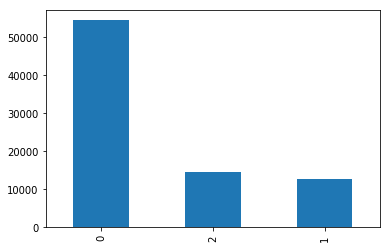

In [348]:

%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
m9['VendorID'].value_counts().plot(kind='bar')

In [346]:

m9['pick_sname'].value_counts()

na                                 27240
Pershing Square North                662
West St & Chambers St                500
Lafayette St & E 8 St                447
Broadway & E 22 St                   429
                                   ...  
Pulaski St & Marcus Garvey Blvd        5
W 84 St & Columbus Ave                 5
Railroad Ave & Kay Ave                 4
Kosciuszko St & Nostrand Ave           3
Throop Ave & Myrtle Ave                2
Name: pick_sname, Length: 464, dtype: int64

In [347]:
m9['trip'].value_counts()

nana                                                          27240
Central Park S & 6 AveCentral Park S & 6 Ave                     50
Brooklyn Bridge Park - Pier 2Brooklyn Bridge Park - Pier 2       28
12 Ave & W 40 StWest St & Chambers St                            28
Pershing Square NorthW 33 St & 7 Ave                             24
                                                              ...  
Clinton St & Grand StHoward St & Centre St                        1
Watts St & Greenwich StChristopher St & Greenwich St              1
Central Park West & W 76 StE 56 St & Madison Ave                  1
E 16 St & 5 AveW 52 St & 5 Ave                                    1
St James Pl & Pearl StWilliam St & Pine St                        1
Name: trip, Length: 30001, dtype: int64

In [349]:
m10['trip']=m10['pick_sname']+m10['drop_sname']

In [350]:
m10['user_type'].value_counts()

cabrider      215047
Subscriber         1
Name: user_type, dtype: int64

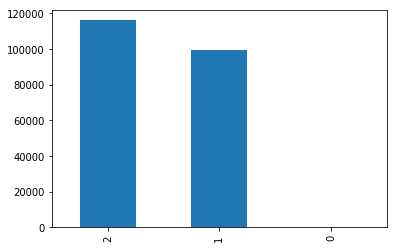

In [351]:

%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
m10['VendorID'].value_counts().plot(kind='bar')

In [352]:

m4['trip']=m4['pick_sname']+m4['drop_sname']

In [353]:
m4['user_type'].value_counts()

Subscriber    77163
Customer      14054
Name: user_type, dtype: int64

In [354]:

m4['pick_sname'].value_counts()

Pershing Square North                             810
West St & Chambers St                             801
E 17 St & Broadway                                772
Lafayette St & E 8 St                             720
Broadway & E 22 St                                691
                                                 ... 
3969.TEMP (Bike The Branches - Central Branch)      9
31 St & Thomson Ave                                 7
Marcy Ave & Lafayette Ave                           6
Railroad Ave & Kay Ave                              2
Yankee Ferry Terminal                               2
Name: pick_sname, Length: 469, dtype: int64

In [355]:

m4['trip'].value_counts()

Central Park S & 6 AveCentral Park S & 6 Ave          119
Central Park S & 6 Ave5 Ave & E 78 St                  90
Old Fulton StCentre St & Chambers St                   47
Central Park S & 6 Ave5 Ave & E 73 St                  45
5 Ave & E 73 St5 Ave & E 73 St                         45
                                                     ... 
Graham Ave & Conselyea StLorimer St & Broadway          1
Greene Ave & Nostrand AvePutnam Ave & Nostrand Ave      1
E 2 St & Avenue CBialystoker Pl & Delancey St           1
Vesey Pl & River TerraceW 37 St & 10 Ave                1
5 Ave & E 29 St9 Ave & W 45 St                          1
Name: trip, Length: 38368, dtype: int64

conclusion: 
    
    cluster properties are as follows:

c1

cab riders
use cabs
trip dist below 2
most pick ups penn stat w42 st dyer ave
no of passengers 1 most
vendors id 2
drop sname e 47 st park ave


c3

passenger counts are mostly 1

most are cab riders

mostlycab

fare for the rides are 5.5 to 7

pick up stations are west st chambers st and carmine st & 6 ave

trip are from central park s and 6 ave central park, central park to ave5 ave & e 78st

trip dist are mostsly 0 to 1.10 miles

c8

more subsribers

dist are 0.7 to 1

fare are 5 to 6.5

pick ups at perishing square north

trips are central park s and 6 ave central park s & 6 ave

c7


trips are perishing sq ne24 st & park ave s

perishing sq north most pick ups

c6

trips are Central Park S & 6 AveCentral Park S & 6 Ave  

pick up points are    West St & Chambers St 

users are subsribers


c9

trips are Central Park S & 6 AveCentral Park S & 6 Ave 

pick ups are Pershing Square North    

good share of subsribers and cab riders

c10

only cab riders

c4

mostly subsribers

pershing sq north

central park s & 6 ave central